In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Step 1: Load the dataset
# Adjust the file path and encoding as necessary
try:
    df = pd.read_csv('/content/Dataset_s_p.csv', encoding='ISO-8859-1')
    print("Data loaded successfully!")
except Exception as e:
    print("Error loading data:", e)

Data loaded successfully!


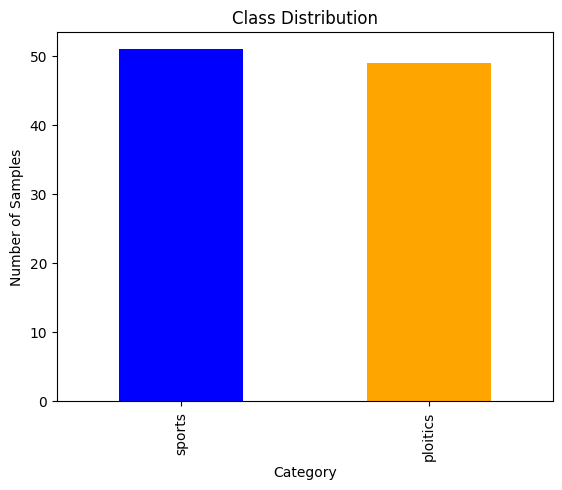

In [ ]:
df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
# Step 2: Check the first few rows to confirm data structure
print(df.head())

# Step 3: Select necessary columns (Title and Category)
try:
    df = df[['Title', 'Category']]  # Ensure column names match exactly
except KeyError as e:
    print("Error with column names:", e)

# Step 4: Split the data into features and labels
X = df['Title']  # Features (text titles)
y = df['Category']  # Labels (sports or politics)

# Step 5: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                               Title  Category  \
0  Nations goes to 12th Jatiya Sangsad elections ...  ploitics   
1  BNP calls hartal for Saturday, Sunday opposing...  ploitics   
2                Cabrera includs 11 more footballers    sports   
3           School Handball tournament gets underway    sports   
4  This victory is not of mine, it's people's vic...  ploitics   

                                                link  
0             https://www.observerbd.com/news/454075  
1             https://www.observerbd.com/news/453963  
2  https://bangladeshpost.net/posts/cabrera-inclu...  
3  https://bangladeshpost.net/posts/school-handba...  
4             https://www.observerbd.com/news/454445  


In [ ]:
# Step 6: Convert text data to a matrix of token counts (Bag of Words model)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Step 7: Initialize the Naïve Bayes classifier
clf = MultinomialNB()

# Step 8: Train the classifier
clf.fit(X_train_counts, y_train)

# Step 9: Make predictions on the test data
y_pred = clf.predict(X_test_counts)

# Step 10: Evaluate the classifier
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    ploitics       0.92      0.92      0.92        13
      sports       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20

Accuracy Score: 0.9
